# Load data

In [1]:
import numpy as np
import os
import time
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import trange , tqdm
import heapq

In [2]:
#read malware opcode sequence
malware_path = "/home/jim/opcode/malware_npy/"
benign_path = "/home/jim/opcode/benign_npy/"
malware_file_name = sorted(os.listdir(malware_path))
benign_file_name = sorted(os.listdir(benign_path))

In [3]:
benign_file_name.pop(0)
benign_file_name.pop(-1)

'preprocess2npy.ipynb'

In [4]:
malware_file_name.pop(0)
malware_file_name.pop(-1)

'preprocess2npy.ipynb'

# Lable

In [6]:
#Labling
def labling(benign_num, mal_num ):
    y = np.zeros(benign_num + mal_num)
    y[mal_num:benign_num+mal_num] = 1
    return y

# Clean empty data

In [ ]:
#clean empty file
X = []
for i in tqdm(malware_file_name):
    try:
        t = np.load(malware_path + '/' + i, encoding = "ASCII")
        tmp = ""
        if(len(t) != 0):
            for j in t:
                tmp += str(j + " ")
                if(j == '16' or j == '32' or j=='64'):
                    print(i)
            X.append(tmp[:-1])
    except:
        pass
malware_length = len(X) 
for i in tqdm(benign_file_name):
    try:
        t = np.load(benign_path + '/' + i, encoding = "ASCII")
        tmp = ""
        if(len(t) != 0):
            for j in t:
                tmp += str(j + " ")
                if(j == '16' or j == '32' or j=='64'):
                    print(i)
            X.append(tmp[:-1])
    except:
        pass
benign_length = len(X) - malware_length

y = labling(benign_length , malware_length)

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 34021/43534 [06:56<01:48, 87.54it/s]

# Preprocessing

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import trange
import heapq

In [258]:
vectorizer = CountVectorizer()

In [259]:
x = vectorizer.fit_transform(X)

In [260]:
x = x.toarray()

In [274]:
vectorizer.get_feature_names()

['16',
 '32',
 '64',
 'aaa',
 'aad',
 'aam',
 'aas',
 'abs',
 'adc',
 'adceq',
 'adcge',
 'adcgt',
 'adchi',
 'adchs',
 'adcle',
 'adclo',
 'adcls',
 'adclt',
 'adcmi',
 'adcne',
 'adcpl',
 'adcs',
 'adcseq',
 'adcsge',
 'adcsgt',
 'adcshi',
 'adcshs',
 'adcsle',
 'adcslo',
 'adcsls',
 'adcslt',
 'adcsmi',
 'adcsne',
 'adcspl',
 'adcsvc',
 'adcsvs',
 'adcvc',
 'adcvs',
 'adcx',
 'add',
 'addc',
 'adde',
 'addeq',
 'addge',
 'addgt',
 'addhi',
 'addhs',
 'addi',
 'addic',
 'addis',
 'addiu',
 'addle',
 'addlo',
 'addls',
 'addlt',
 'addme',
 'addmi',
 'addne',
 'addp',
 'addpd',
 'addpl',
 'addps',
 'adds',
 'adds_a',
 'addsd',
 'addseq',
 'addsge',
 'addsgt',
 'addshi',
 'addshs',
 'addsle',
 'addslo',
 'addsls',
 'addslt',
 'addsmi',
 'addsne',
 'addspl',
 'addss',
 'addsubps',
 'addsvc',
 'addsvs',
 'addu',
 'adduh',
 'addv',
 'addvc',
 'addvs',
 'addw',
 'addweq',
 'addwge',
 'addwgt',
 'addwhi',
 'addwlo',
 'addwls',
 'addwlt',
 'addwmi',
 'addwne',
 'addwpl',
 'addze',
 'adox',
 '

In [49]:
number = []
for i in trange(len(vectorizer.get_feature_names())):
    number.append(sum(x[:,i]))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4363/4363 [00:16<00:00, 263.37it/s]


In [45]:
len(vectorizer.get_feature_names())

4363

In [64]:
number_100 = sorted(list(map(number.index , heapq.nlargest(100,number)))) 

In [70]:
number_100_feature = []
for i in number_100:
    number_100_feature.append(vectorizer.get_feature_names()[i])

In [74]:
np.save('top_100_feature' , number_100_feature)

# clean not top feature

In [44]:
top_feature = np.load('./top_100_feature.npy').tolist()

In [45]:
#clean empty file
X = []
for i in tqdm(malware_file_name):
    try:
        t = np.load(malware_path + '/' + i, encoding = "ASCII")
        tmp = ""
        if(len(t) != 0):
            for j in t:
                if(j in top_feature):
                    tmp += str(j + " ")
            X.append(tmp[:-1])
        else:
            X.append(tmp)
    except:
        pass
malware_length = len(X) 
for i in tqdm(benign_file_name):
    try:
        t = np.load(benign_path + '/' + i, encoding = "ASCII")
        tmp = ""
        if(len(t) != 0):
            for j in t:
                if(j in top_feature):
                    tmp += str(j + " ")
            X.append(tmp[:-1])
        else:
            X.append(tmp)
    except:
        pass
benign_length = len(X) - malware_length

y = labling(benign_length , malware_length)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43535/43535 [16:34<00:00, 43.78it/s]


# Create clean npy

In [10]:
for i in tqdm(malware_file_name):
    try:
        t = np.load(malware_path + '/' + i, encoding = "ASCII")
        tmp = []
        if(len(t) != 0):
            for j in t:
                if(j in top_feature):
                    tmp.append(j)
        np.save('./malware_process_npy/' + i[:-4] , tmp)
    except:
        pass

for i in tqdm(benign_file_name):
    try:
        t = np.load(benign_path + '/' + i, encoding = "ASCII")
        tmp = []
        if(len(t) != 0):
            for j in t:
                if(j in top_feature):
                    tmp.append(j)
        np.save('./benignware_process_npy/' + i[:-4] , tmp)
    except:
        pass

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43536/43536 [14:50<00:00, 48.91it/s]


# count times

In [88]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(X)
x = x.toarray()

In [91]:
feature_name = vectorizer.get_feature_names()

# create record file

In [9]:
def get_index(seq , item):
    result = np.where(seq == item)[0]
    result = result.tolist()
    return result

In [10]:
def get_sorted_index(count):
    result = []
    for i in range(100):
        m = count.index(max(count))
        result.append(m)
        count[m] = -1
    return result

In [11]:
def producer(times_count , seq):
    tmp = []
    sorted_index = get_sorted_index(times_count)
    for i in sorted_index:
        tmp.append((i , get_index(seq , i)))
    return tmp

In [5]:
x = np.load('./top__feature_times_count.npy')

In [6]:
feature_name = np.load('./feature_name.npy')

In [7]:
feature_name = feature_name.tolist()

In [8]:
table = dict(zip(feature_name,range(100)))

In [57]:
for i in trange(len(malware_file_name)):
    data_store = []
    file_content = np.load('./malware_process_npy/' + malware_file_name[i])
    file_content = file_content.tolist()
    for j in range(len(file_content)):
        file_content[j] = table[file_content[j]]
    file_content = np.array(file_content)
    result = producer(x[i,:].tolist(),file_content)
    data_store.append(result)
    np.save('./malware_record/'+ malware_file_name[i][:-4] , data_store)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40378/40378 [04:15<00:00, 158.32it/s]


In [12]:
for i in trange(len(benign_file_name)):
    data_store = []
    file_content = np.load('./benignware_process_npy/' + benign_file_name[i])
    file_content = file_content.tolist()
    for j in range(len(file_content)):
        file_content[j] = table[file_content[j]]
    file_content = np.array(file_content)
    result = producer(x[len(malware_file_name)+i,:].tolist(),file_content)
    data_store.append(result)
    np.save('./benignware_record/'+ benign_file_name[i][:-4] , data_store)

  0%|                                                                                                                               | 0/43534 [00:00<?, ?it/s]/home/jim/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43534/43534 [04:54<00:00, 147.80it/s]


# generate graph

In [6]:
def function(times_list_1 , times_list_2):
    a = 1
    e = 2.71
    result = 0
    for l in times_list_1:
        min_list = []
        for j in times_list_2:
            min_list.append(abs(l - j - 1))
        number = min(min_list)
        tmp = 2/(1+(a*(e**(number))))
        result += tmp
    return result

In [ ]:
for m in tqdm(malware_file_name):
    data = np.load('./malware_record/'+ m , allow_pickle=True)
    data = data.tolist()[0]
    matrix = np.zeros((100,100))
    for i in range(100):
        if(data[i][1] == []):
            break
        for k in range(5):
            try:
                matrix[data[i][0] , data[i+k][0]] = function(data[i][1],data[i+k][1])
            except:
                pass
    np.save('./test/'+ m[:-4] , matrix)

  0%|                                                                                                                                                                             | 0/40378 [00:00<?, ?it/s]

In [ ]:
for m in tqdm(benign_file_name):
    data = np.load('./benignware_record/'+ m , allow_pickle=True)
    data = data.tolist()[0]
    matrix = np.zeros((100,100))
    flag = 0
    for i in range(100):
        if(data[i][1] == []):
            break
        for k in range(5):
            try:
                if(data[i+k][1] == []):
                    flag = 1
                    break
                matrix[data[i][0] , data[i+k][0]] = function(data[i][1],data[i+k][1])
            except:
                pass
        if(flag == 1):
            break
    np.save('./benignware_graph/'+ m[:-4] , matrix)

  0%|                                                                                                                  | 1/43534 [00:04<56:28:32,  4.67s/it]

In [10]:
data = np.load('./benignware_record/'+ benign_file_name[0] , allow_pickle=True)
data = data.tolist()[0]
matrix = np.zeros((100,100))
flag = 0
for i in range(100):
    if(data[i][1] == []):
        break
    for k in range(5):
        try:
            if(data[i+k][1] == []):
                flag = 1
                break
            matrix[data[i][0] , data[i+k][0]] = function(data[i][1],data[i+k][1])
        except:
            pass
    if(flag == 1):
        break

# Eigenvector

In [5]:
benign_graph_path = './benignware_graph/'
malware_graph_path = './malware_graph/'
benign_graph = sorted(os.listdir(benign_graph_path))
malware_graph = sorted(os.listdir(malware_graph_path))

In [6]:
malware_graph.pop(0)
benign_graph.pop(0)

'.ipynb_checkpoints'

## Malware/Benignware

In [8]:
X_benign = []
X_malware = []
for i in tqdm(malware_graph):
    matrix = np.load(malware_graph_path + i)
    val,vec = np.linalg.eig(matrix)
    val = val.tolist()
    vec = vec.tolist()
    max_number_index = []
    for j in range(2):
        s = val.index(max(val))
        max_number_index.append(s)
        val[s] = -1
    two_eigenvector = vec[max_number_index[0]]+vec[max_number_index[1]]
    X_benign.append(two_eigenvector)
benign_length = len(X_benign)

for i in tqdm(benign_graph):
    matrix = np.load(benign_graph_path + i)
    val,vec = np.linalg.eig(matrix)
    val = val.tolist()
    vec = vec.tolist()
    max_number_index = []
    for j in range(2):
        s = val.index(max(val))
        max_number_index.append(s)
        val[s] = -1
    two_eigenvector = vec[max_number_index[0]]+vec[max_number_index[1]]
    X_malware.append(two_eigenvector)

malware_length = len(X_malware)
y_benign = np.zeros(benign_length).tolist()
y_malware = np.ones(malware_length).tolist()



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4880/4880 [00:01<00:00, 2749.52it/s]


In [6]:
import pandas as pd
filename_csv = pd.read_csv('/mnt/dataset/dataset.csv')
filename = list(filename_csv.iloc[:,0])
label = list(filename_csv.iloc[:,1])
table = dict(zip(set(label), range(10)))

/home/jim/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
table

{'BenignWare': 0,
 'Android': 1,
 'Mirai': 2,
 'Bashlite': 3,
 'Hajime': 4,
 'Dofloo': 5,
 'Pnscan': 6,
 'Tsunami': 7,
 'Unknown': 8,
 'Xorddos': 9}

In [21]:
X_benign = []
X_malware = []
y_benign = []
y_malware = []
for i in tqdm(malware_graph):
    matrix = np.load(malware_graph_path + i)
    val,vec = np.linalg.eig(matrix)
    val = val.tolist()
    vec = vec.tolist()
    max_number_index = []
    for j in range(2):
        s = val.index(max(val))
        max_number_index.append(s)
        val[s] = -1
    two_eigenvector = vec[max_number_index[0]]+vec[max_number_index[1]]
    X_benign.append(two_eigenvector)
    y_benign.append(table['BenignWare'])

benign_length = len(X_benign)

for i in tqdm(benign_graph):
    matrix = np.load(benign_graph_path + i)
    val,vec = np.linalg.eig(matrix)
    val = val.tolist()
    vec = vec.tolist()
    max_number_index = []
    for j in range(2):
        s = val.index(max(val))
        max_number_index.append(s)
        val[s] = -1
    two_eigenvector = vec[max_number_index[0]]+vec[max_number_index[1]]
    X_malware.append(two_eigenvector)
    y_malware.append(table[label[filename.index(i[:-4])]]) 


malware_length = len(X_malware)
 

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4880/4880 [00:02<00:00, 1864.03it/s]


In [9]:
from sklearn.model_selection import train_test_split
x_benign_train ,x_benign_test ,y_benign_train ,y_benign_test = train_test_split( X_benign,y_benign,train_size =0.8 )
x_malware_train ,x_malware_test ,y_malware_train ,y_malware_test = train_test_split( X_malware,y_malware,train_size =0.8 )
x_train = x_benign_train + x_malware_train
x_test = x_benign_test + x_malware_test
y_train = y_benign_train + y_malware_train
y_test =y_benign_test + y_malware_test

In [10]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Flatten
from keras.utils import np_utils

2023-01-18 21:47:59.119878: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-18 21:47:59.196680: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-18 21:47:59.198707: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-18 21:47:59.198716: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudar

In [11]:
y_train = np_utils.to_categorical(y_train,2)
y_test = np_utils.to_categorical(y_test,2)

In [24]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [12]:
x_train = np.array(x_train)
x_test = np.array(x_test)

## test(mal/ben)

In [12]:
result_accuracy = []
test_accuracy = []
for i in range(31,32):
    model = Sequential()
    model.add(Dense(units=256, input_dim=200, kernel_initializer='normal', activation='relu')) 
    model.add(Dense(units=128, kernel_initializer='normal', activation='relu'))
    # model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=2, kernel_initializer='normal', activation='sigmoid'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
    model.fit(x_train, y_train, epochs=i)
    result = model.evaluate(x_train,y_train)
    result_accuracy.append(result[1])
    result = model.evaluate(x_test, y_test)
    test_accuracy.append(result[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               51456     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 92,738
Trainable params: 92,738
Non-trainable params: 0
_________________________________________________________________
Epoch 1/31


2023-01-15 17:36:08.268494: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-15 17:36:08.268529: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-15 17:36:08.268551: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (islabunkill): /proc/driver/nvidia/version does not exist
2023-01-15 17:36:08.268885: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


255/255 [==============================] - 1s 2ms/step - loss: 0.5500 - accuracy: 0.7074
Epoch 2/31
255/255 [==============================] - 1s 2ms/step - loss: 0.4213 - accuracy: 0.7962
Epoch 3/31
255/255 [==============================] - 1s 2ms/step - loss: 0.3641 - accuracy: 0.8319
Epoch 4/31
255/255 [==============================] - 0s 2ms/step - loss: 0.3251 - accuracy: 0.8534
Epoch 5/31
255/255 [==============================] - 1s 2ms/step - loss: 0.3027 - accuracy: 0.8691
Epoch 6/31
255/255 [==============================] - 1s 2ms/step - loss: 0.2728 - accuracy: 0.8818
Epoch 7/31
255/255 [==============================] - 1s 2ms/step - loss: 0.2537 - accuracy: 0.8908
Epoch 8/31
255/255 [==============================] - 1s 2ms/step - loss: 0.2355 - accuracy: 0.9014
Epoch 9/31
255/255 [==============================] - 1s 2ms/step - loss: 0.2227 - accuracy: 0.9057
Epoch 10/31
255/255 [==============================] - 1s 2ms/step - loss: 0.2080 - accuracy: 0.9130
Epoch 11/3

In [13]:
model.save('./MD.pb')

INFO:tensorflow:Assets written to: ./MD.pb/assets


INFO:tensorflow:Assets written to: ./MD.pb/assets


In [13]:
from tensorflow import keras
myModel = keras.models.load_model('./MD.pb')

2023-01-18 21:48:06.439682: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-18 21:48:06.440047: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-18 21:48:06.440054: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (islabunkill): /proc/driver/nvidia/version does not exist
2023-01-18 21:48:06.441257: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
d = np.reshape(x_test[0,:],(1,200))

In [28]:
myModel.predict(d)[0]

1/1 [==============================] - 0s 9ms/step


array([0.6210788 , 0.37600878], dtype=float32)

In [27]:
result_accuracy_1 = list(zip(result_accuracy, range(len(result_accuracy))))
test_accuracy_1 = list(zip(test_accuracy, range(len(test_accuracy))))
import matplotlib.pyplot as plt
result_accuracy_1 = np.array(result_accuracy_1)
test_accuracy_1 = np.array(test_accuracy_1)

In [28]:
result_accuracy_1[:,1] = result_accuracy_1[:,1]+25
test_accuracy_1[:,1] = test_accuracy_1[:,1]+25

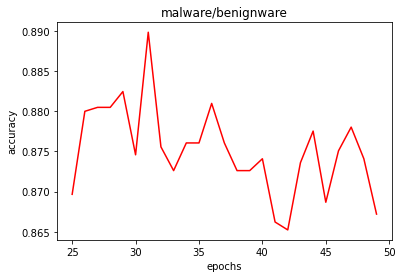

In [29]:
plt.plot(test_accuracy_1[:,1],test_accuracy_1[:,0],c = 'r')

plt.title('malware/benignware')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

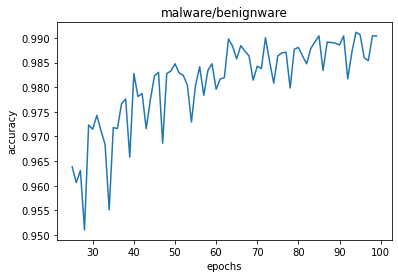

In [37]:
plt.plot(result_accuracy_1[:,1],result_accuracy_1[:,0])
plt.title('malware/benignware')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

## test(family classification)

In [32]:
result_accuracy = []
test_accuracy = []
for i in range(49,50):
    model = Sequential()
    model.add(Dense(units=256, input_dim=200, kernel_initializer='normal', activation='relu')) 
    model.add(Dense(units=128, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))

    model.add(Dense(units=10, kernel_initializer='normal', activation='sigmoid'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
    model.fit(x_train, y_train, epochs=i)
    result = model.evaluate(x_train, y_train)
    result_accuracy.append(result[1])
    result = model.evaluate(x_test, y_test)
    test_accuracy.append(result[1]) 

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_124 (Dense)           (None, 256)               51456     
                                                                 
 dense_125 (Dense)           (None, 128)               32896     
                                                                 
 dense_126 (Dense)           (None, 64)                8256      
                                                                 
 dense_127 (Dense)           (None, 10)                650       
                                                                 
Total params: 93,258
Trainable params: 93,258
Non-trainable params: 0
_________________________________________________________________
Epoch 1/49
255/255 [==============================] - 1s 2ms/step - loss: 1.2748 - accuracy: 0.5490
Epoch 2/49
255/255 [==============================] - 1s 2ms/step - loss: 0.9369 

In [33]:
model.save('./FC.pb')

INFO:tensorflow:Assets written to: ./FC.pb/assets


INFO:tensorflow:Assets written to: ./FC.pb/assets


In [34]:
from tensorflow import keras
myModel = keras.models.load_model('./FC.pb')

In [36]:
myModel.evaluate(x_test,y_test)

64/64 [==============================] - 0s 487us/step - loss: 1.2292 - accuracy: 0.8155


[1.2292081117630005, 0.815543532371521]

In [29]:
max(test_accuracy)

0.8396458625793457

In [30]:
result_accuracy_2 = list(zip(result_accuracy, range(len(result_accuracy))))
import matplotlib.pyplot as plt
result_accuracy_2 = np.array(result_accuracy_2)

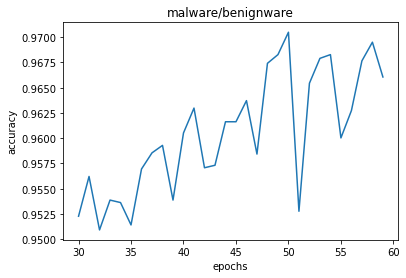

In [31]:
result_accuracy_2[:,1] = result_accuracy_2[:,1]+30
plt.plot(result_accuracy_2[:,1],result_accuracy_2[:,0])
plt.title('malware/benignware')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

## Real

In [20]:
model = Sequential()
model.add(Dense(units=64, input_dim=200, kernel_initializer='normal', activation='relu')) 
model.add(Dense(units=128, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=256, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=2, kernel_initializer='normal', activation='sigmoid'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                12864     
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 256)               33024     
                                                                 
 dense_8 (Dense)             (None, 64)                16448     
                                                                 
 dense_9 (Dense)             (None, 2)                 130       
                                                                 
Total params: 70,786
Trainable params: 70,786
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(x_train, y_train, epochs=20)
result = model.evaluate(x_test, y_test)
print('\n Testing accuracy:',result[1])

Epoch 1/20
133/133 [==============================] - 0s 750us/step - loss: 0.6135 - accuracy: 0.6583
Epoch 2/20
133/133 [==============================] - 0s 695us/step - loss: 0.4936 - accuracy: 0.7565
Epoch 3/20
133/133 [==============================] - 0s 695us/step - loss: 0.4138 - accuracy: 0.8141
Epoch 4/20
133/133 [==============================] - 0s 728us/step - loss: 0.3744 - accuracy: 0.8384
Epoch 5/20
133/133 [==============================] - 0s 741us/step - loss: 0.3351 - accuracy: 0.8521
Epoch 6/20
133/133 [==============================] - 0s 745us/step - loss: 0.3108 - accuracy: 0.8653
Epoch 7/20
133/133 [==============================] - 0s 784us/step - loss: 0.2806 - accuracy: 0.8811
Epoch 8/20
133/133 [==============================] - 0s 748us/step - loss: 0.2628 - accuracy: 0.8893
Epoch 9/20
133/133 [==============================] - 0s 742us/step - loss: 0.2492 - accuracy: 0.8962
Epoch 10/20
133/133 [==============================] - 0s 759us/step - loss: 0.235

In [13]:
y_test[:,1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
len(y_train)

2452